In [1]:
# imports
from tueplots import bundles
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots  import figsizes

import sys
%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [285]:
from analysis import sweep2df, format_violin

In [3]:
plt.rcParams.update(bundles.neurips2022(usetex=False))

In [4]:
# Constants
ENTITY = "ima-vae"
PROJECT = "priors"


In [213]:
SWEEP_ID = "vtyztyfn"
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"moebius_lin_map_sweep_{SWEEP_ID}.csv"
runs_df1 = sweep2df(sweep.runs, filename, save=True,load=True)

In [215]:
SWEEP_ID = "uac6296c"
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"moebius_lin_map_sweep_{SWEEP_ID}.csv"
runs_df2 = sweep2df(sweep.runs, filename, save=True,load=True)

In [217]:
SWEEP_ID = "afkhqbu9"
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"ar_flow_sweep_{SWEEP_ID}.csv"
runs_df_flow = sweep2df(sweep.runs, filename, save=True,load=False)

Encountered a faulty run with ID dark-sweep-71
Encountered a faulty run with ID fluent-sweep-17


In [218]:
runs_df = pd.concat([runs_df1, runs_df2]).reset_index(drop=True)

In [219]:
runs_df

,name,dim,gamma_square,neg_elbo,kl_loss,rec_loss,prior,cima,mcc,min_cima,...,sigma_0,sigma_1,sigma_2,col_norm_sq_0,col_norm_sq_1,col_norm_sq_2,rhs_0,rhs_1,rhs_2,mixing_cima
0,polished-sweep-20,3,100000.0,-0.426595,-6.929638,7.356230,uniform,0.717031,0.502673,0.172821,...,3.018892,0.001952,0.000478,0.000007,0.123075,0.378130,1.370781,0.000081,0.000026,NaN
1,deep-sweep-19,3,100000.0,-3.257252,-8.536672,11.793924,uniform,1.194666,0.542405,0.293156,...,2.991586,0.000270,0.000187,0.000004,0.858828,1.054050,2.827401,0.000012,0.000009,NaN
2,sandy-sweep-18,3,100000.0,4.223285,-7.947907,3.724625,uniform,2.267430,0.614751,0.138228,...,2.549276,0.001252,0.000134,0.000005,0.176430,1.558773,1.977094,0.000057,0.000006,NaN
3,fragrant-sweep-17,3,100000.0,10.361102,-10.001373,-0.359727,uniform,1.639534,0.556086,0.243287,...,2.925527,0.000079,0.000032,0.000004,2.879470,5.636644,2.232702,0.000003,0.000002,NaN
4,dauntless-sweep-16,3,100000.0,9.389432,-9.437149,0.047718,uniform,1.402014,0.585836,0.358532,...,2.876235,0.000193,0.000031,0.000021,0.965567,6.395566,0.481879,0.000010,0.000002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,still-sweep-5,3,100000.0,-3.430891,-8.737994,12.168889,uniform,0.012383,0.801024,0.003800,...,0.029224,0.006585,0.000816,0.014736,0.046537,0.327768,0.000679,0.000215,0.000031,-1.0
94,youthful-sweep-4,3,100000.0,-4.153049,-8.451396,12.604446,uniform,0.126966,0.948396,0.009967,...,0.009998,0.011723,0.003336,0.033125,0.038381,0.103651,0.000302,0.000261,0.000096,-1.0
95,deep-sweep-3,3,100000.0,-0.189227,-12.081679,12.270907,uniform,0.012070,0.684325,0.011468,...,0.003770,0.000460,0.000030,0.056627,0.523196,7.148948,0.000177,0.000019,0.000001,-1.0
96,distinctive-sweep-2,3,100000.0,-1.327792,-10.123688,11.451480,uniform,0.011415,0.864192,0.009971,...,0.012086,0.000555,0.000773,0.022032,0.463141,0.355368,0.000454,0.000022,0.000028,-1.0


In [284]:
runs_df.mixing_linear_map_cima.describe()

count    98.000000
mean      2.386011
std       1.283448
min       0.394013
25%       1.440110
50%       2.100690
75%       2.995080
max       6.746654
Name: mixing_linear_map_cima, dtype: float64

In [283]:
runs_df_flow.mixing_cima.describe()

count    32.000000
mean      0.296732
std       0.494948
min       0.001776
25%       0.041143
50%       0.154275
75%       0.298656
max       2.593789
Name: mixing_cima, dtype: float64

(<AxesSubplot:>, <AxesSubplot:>)

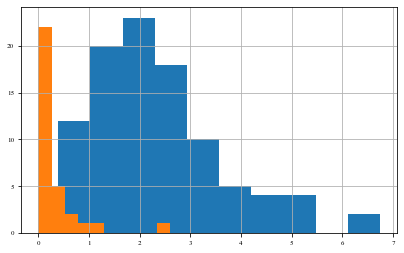

In [249]:
runs_df.mixing_linear_map_cima.hist(), runs_df_flow.mixing_cima.hist()

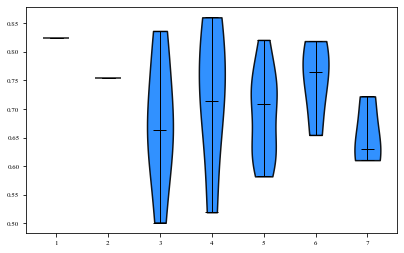

In [287]:
quartile_bins = runs_df_flow.mixing_cima.describe()[["min", "25%", "50%", "75%", "max"]].tolist()
NUM_BINS = 8#len(quartile_bins)
bins = np.logspace( np.log10(runs_df_flow.mixing_cima.min()-1e-8), np.log10(runs_df_flow.mixing_cima.max()+1e-8), NUM_BINS)
binned_cima = pd.cut(runs_df_flow.mixing_cima, bins=bins, labels=list(range(NUM_BINS-1)), retbins=False, right=True, include_lowest=True)

groups = [runs_df_flow.mcc4min_neg_elbo[binned_cima==label] for label in list(range(NUM_BINS-1))]
vp = plt.violinplot(groups, showmedians=True)
format_violin(vp)

In [37]:
"""Data for Mobius with linear maps"""
quartile_bins = runs_df.mixing_linear_map_cima.describe()[["min", "25%", "50%", "75%", "max"]].tolist()
NUM_BINS = 6 #len(quartile_bins)
bins = np.logspace( np.log10(runs_df.mixing_linear_map_cima.min()-1e-8), np.log10(runs_df.mixing_linear_map_cima.max()+1e-8), NUM_BINS)
binned_cima, retbins = pd.cut(runs_df.mixing_linear_map_cima, bins=bins, labels=list(range(NUM_BINS-1)), retbins=True, right=True, include_lowest=True)

/var/folders/rb/d8k1n6bj4lg801y0yxz4jtbh0000gn/T/ipykernel_40393/3764264506.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( xticklabels)


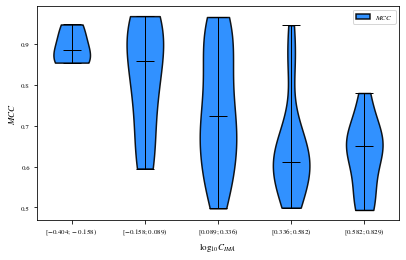

In [279]:
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

# """MCC vs CIMA over different gamma"""
# ax = fig.add_subplot(121)
# ax2 = ax.twinx()
#
# vp= ax.violinplot([np.log10(g) for g in gg_cima], showmedians=True)
# format_violin(vp)
# ax.set_ylabel("$\log_{10} C_{IMA}$")
#
# vp2= ax2.violinplot(gg_mcc, showmedians=True)
# format_violin(vp2,'#D0021B')
# ax2.set_ylabel("$MCC$")
#
# ax.set_xlabel("$\log_{10}\gamma^2$")
# ax.set_xticklabels([0]+ sorted(np.log10(runs_df["gamma_square"]).astype(int).unique()))
# plt.legend([vp['bodies'][0],vp2['bodies'][0]], ["$\log_{10} C_{IMA}$", "$MCC$"], loc='right')

"""MCC vs the mixing lin map's CIMA"""
groups = [runs_df.mcc4min_neg_elbo[binned_cima==label] for label in list(range(NUM_BINS-1))]
ax = fig.add_subplot(111)
vp = plt.violinplot(groups, showmedians=True)
format_violin(vp)

ax.set_ylabel("$MCC$")
ax.set_xlabel("$\log_{10}C_{IMA}$")
logbins = sorted(np.log10(bins))
xticklabels = [0]+[f"$[{logbins[i]:.3f};{logbins[i+1]:.3f})$" for i in range(NUM_BINS-1)]
ax.set_xticklabels( xticklabels)

plt.legend([vp['bodies'][0],], ["$MCC$"], loc='upper right')


plt.savefig("moebius_mcc_lin_map_cima.svg")